<a href="https://colab.research.google.com/github/EUNYUGNYU/Indian_project/blob/main/Pima_Indian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터 불러오기 및 정리**

---






In [1]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = 'pima-indians-diabetes.csv'


Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [16]:
# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 불러온 데이터셋을 적용합니다. 이 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv(my_data,
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [17]:
# 처음 5줄을 봅니다.
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


순서대로 '과거 임신횟수, 포도당 검사 이후 공복 혈당 농도, 확장기 혈압, 
삼두근 피부 주름 두께, 혈청 인슐린, 체질량 지수, 당뇨병 가족력, 나이' 입니다.

레이블은 {1=당뇨, 0= 당뇨 아님} 이다.

In [18]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

# 레이블 비율 확인
print(df['class']. value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
0    500
1    268
Name: class, dtype: int64


즉, 전체 데이터의 65.1 % 가 당뇨가 아니다. 반대로 34.9% 당뇨입니다.

null 값은 없습니다.

In [19]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


 pregnant , plasma, pressure, thickness, Insulin 의 최솟값이 0 입니다. 

 추후 모델의 성능이 낮게 나왔을 때는 이 변수의 데이터에는 이상이 없는지 확인해 줍니다.

In [20]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['plasma', 'class']])

     plasma  class
0       148      1
1        85      0
2       183      1
3        89      0
4       137      1
..      ...    ...
763     101      0
764     122      0
765     121      0
766     126      1
767      93      0

[768 rows x 2 columns]


# **2. EDA**

---



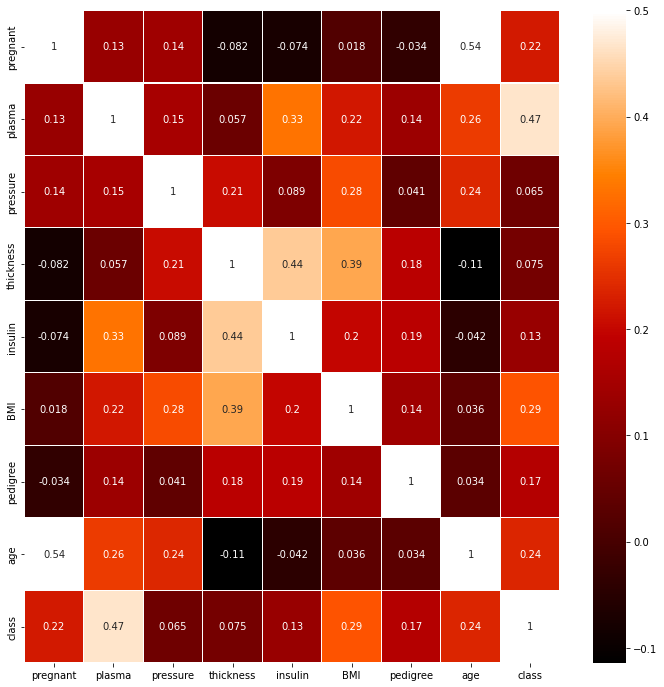

In [21]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

히트맵을 그린 결과 모든 변수의 변수간 상관관계가 낮은 것으로 (+- 0.5 기준) 확인됩니다.

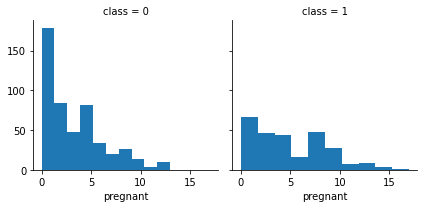

In [22]:
# 각 변수별 히스토그램

# pregnant 히스토그램
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'pregnant',  bins=10)
plt.show()

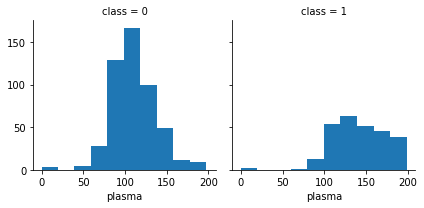

In [23]:
# plasma 히스토그램
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

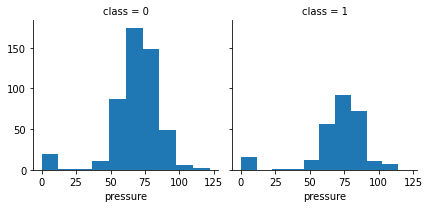

In [24]:
# pressure 히스토그램
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'pressure',  bins=10)
plt.show()

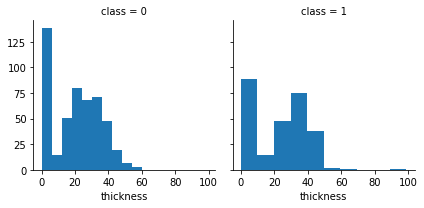

In [25]:
# thickness 히스토그램
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'thickness',  bins=10)
plt.show()

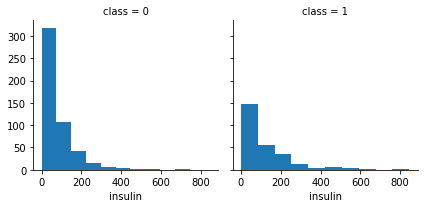

In [26]:
# insulin 히스토그램
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'insulin',  bins=10)
plt.show()

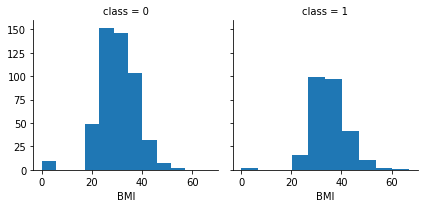

In [27]:
# BMI 히스토그램
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'BMI',  bins=10)
plt.show()

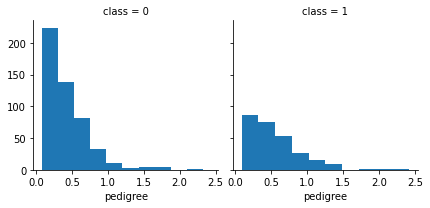

In [28]:
# pedigree 히스토그램
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'pedigree',  bins=10)
plt.show()

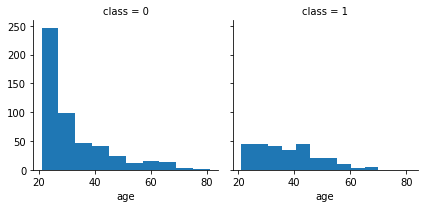

In [29]:
# age 히스토그램
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'age',  bins=10)
plt.show()

각 변수의 class 별 값 분포를 살펴보았습니다. 일부 변수의 데이터가 0 혹은 0 근처의 값들이 많은 것이 확인됩니다.

# **3. 데이터 분할 및 전처리**


In [30]:
# 1) 원본 데이터 분할

from sklearn.model_selection import train_test_split

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(0)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

print (X_train, X_test, y_train, y_test)

     pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age
34         10     122        78         31        0  27.6     0.512   45
221         2     158        90          0        0  31.6     0.805   66
531         0     107        76          0        0  45.3     0.686   24
518        13      76        60          0        0  32.8     0.180   41
650         1      91        54         25      100  25.2     0.234   23
..        ...     ...       ...        ...      ...   ...       ...  ...
628         5     128        80          0        0  34.6     0.144   45
456         1     135        54          0        0  26.7     0.687   62
398         3      82        70          0        0  21.1     0.389   25
6           3      78        50         32       88  31.0     0.248   26
294         0     161        50          0        0  21.9     0.254   65

[537 rows x 8 columns]      pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age
608         0     152      

TR과 TS를 0.7, 0.3 로 분할한다. 

In [31]:
# 2) 최대-최소 정규화 후 데이터 분할

from sklearn.preprocessing import MinMaxScaler

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(0)

# X에 대해 최대최소 정규화 실시

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

# 데이터 분할
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=0)

print (X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test)

[[0.58823529 0.61306533 0.63934426 ... 0.41132638 0.1853117  0.4       ]
 [0.11764706 0.79396985 0.73770492 ... 0.4709389  0.31041845 0.75      ]
 [0.         0.53768844 0.62295082 ... 0.67511177 0.25960717 0.05      ]
 ...
 [0.17647059 0.4120603  0.57377049 ... 0.31445604 0.13279249 0.06666667]
 [0.17647059 0.3919598  0.40983607 ... 0.46199702 0.07258753 0.08333333]
 [0.         0.80904523 0.40983607 ... 0.32637854 0.07514944 0.73333333]] [[0.         0.7638191  0.67213115 ... 0.61847988 0.08198121 0.1       ]
 [0.         0.6281407  0.55737705 ... 0.3681073  0.05465414 0.        ]
 [0.17647059 0.6080402  0.42622951 ... 0.53651267 0.02092229 0.06666667]
 ...
 [0.05882353 0.35678392 0.63934426 ... 0.4947839  0.14688301 0.        ]
 [0.58823529 0.84422111 0.60655738 ... 0.56631893 0.19598634 0.21666667]
 [0.         0.46733668 0.49180328 ... 0.52608048 0.07899231 0.06666667]] 34     0
221    1
531    0
518    0
650    0
      ..
628    0
456    0
398    0
6      1
294    0
Name: class, 

In [32]:
# 3) 표준화 후 데이터 분할

from sklearn.preprocessing import StandardScaler

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(0)

# X에 대해 최대최소 정규화 실시

scaler1 = StandardScaler()
scaler1.fit(X)

X_scaled1 = scaler1.transform(X)

X_scaled1_train, X_scaled1_test, y_scaled1_train, y_scaled1_test = train_test_split(X_scaled1, y, stratify=y, test_size=0.3, random_state=0)

print (X_scaled1_train, X_scaled1_test, y_scaled1_train, y_scaled1_test)

[[ 1.82781311  0.03459802  0.45982725 ... -0.5575027   0.12117833
   1.00055664]
 [-0.54791859  1.16129525  1.08020025 ... -0.04982572  1.0060731
   2.78739945]
 [-1.14185152 -0.43485916  0.35643175 ...  1.68896794  0.64667898
  -0.78628618]
 ...
 [-0.25095213 -1.2172878   0.04624525 ... -1.3824778  -0.25029627
  -0.70119842]
 [-0.25095213 -1.34247638 -0.98770975 ... -0.12597727 -0.676133
  -0.61611067]
 [-1.14185152  1.25518668 -0.98770975 ... -1.2809424  -0.65801229
   2.7023117 ]] [[-1.14185152  0.97351238  0.66661825 ...  1.20667481 -0.60969039
  -0.53102292]
 [-1.14185152  0.12848945 -0.05715025 ... -0.92556851 -0.80297799
  -1.04154944]
 [-0.25095213  0.00330087 -0.88431425 ...  0.50861896 -1.04156736
  -0.70119842]
 ...
 [-0.84488505 -1.5615564   0.45982725 ...  0.15324507 -0.15063235
  -1.04154944]
 [ 1.82781311  1.4742667   0.25303625 ...  0.76245745  0.1966813
   0.06459135]
 [-1.14185152 -0.8730192  -0.47073225 ...  0.41977549 -0.63083122
  -0.70119842]] 34     0
221    1
53

스케일링 후에 X와 y로 분할 했지만 사실 y와 y_scaled, y_scaled1 는 모두 같습니다.(그대로 0 or 1 을 값으로 가짐)

# **4. 의사결정트리 (DT)**


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# raw data
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.701


In [40]:
# 최대-최소 정규화
tree_scaled = DecisionTreeClassifier(random_state=0)
tree_scaled .fit(X_scaled_train, y_scaled_train)
print("Accuracy on training set: {:.3f}".format(tree_scaled .score(X_scaled_train, y_scaled_train)))
print("Accuracy on test set: {:.3f}".format(tree_scaled .score(X_scaled_test, y_scaled_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.697


In [41]:
# 표준화
tree_scaled1  = DecisionTreeClassifier(random_state=0)
tree_scaled1.fit(X_scaled1_train, y_scaled1_train)
print("Accuracy on training set: {:.3f}".format(tree_scaled1.score(X_scaled1_train, y_scaled1_train)))
print("Accuracy on test set: {:.3f}".format(tree_scaled1.score(X_scaled1_test, y_scaled1_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.701


DT는 데이터 전처리의 영향을 크게 받지 않는다. 따라서, 그냥 raw data를 사용한 모델을 사용한다.

이번에는 과적합을 줄이기 위해 가지치기를 해줍니다.


**1) DT 값 보정 - 가지치기**

In [61]:
# 가지치기
tree1 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))

Accuracy on training set: 0.819
Accuracy on test set: 0.758


나무 깊이가 2개이면 정확도가 .749이고 1개씩 늘릴수록 tr의 정확도는 점점 줄어들지만 ts의 값은 변경됩니다. 따라서 depth를 2~10개까지 찍고 가장 최적의 값으로 depth=4 라고 가정했습니다.

가지치기 결과 TR의 정확도는 줄었지만, TS의 성능은 향상된 것을 알 수 있습니다.



2) DT 값 보정 - 교차검증

In [48]:
# 폴드 수 3
from sklearn.model_selection import cross_val_score
  
scores_dt3 = cross_val_score(tree1 , X_train, y_train ,cv=3)

print('교차 검증별 정확도:',np.round(scores_dt3, 4))
print('평균 검증 정확도:', np.round(np.mean(scores_dt3), 4))

교차 검증별 정확도: [0.7207 0.7095 0.7095]
평균 검증 정확도: 0.7132


In [49]:
# 폴드 수 5

from sklearn.model_selection import cross_val_score
  
scores_dt5 = cross_val_score(tree1 , X_train, y_train ,cv=5)

print('교차 검증별 정확도:',np.round(scores_dt5, 4))
print('평균 검증 정확도:', np.round(np.mean(scores_dt5), 4))

교차 검증별 정확도: [0.7315 0.7778 0.7477 0.7009 0.7477]
평균 검증 정확도: 0.7411


폴드 수를 5개로 나눠서 검증시 TR의 accuracy는 0.7411 입니다. 

** 3) DT의 최종 성능 평가**

In [ ]:
# tree1의 레이블 예측
y_pred1 = tree1.predict(X_test)
print(y_pred1)

[0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1
 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


In [ ]:
# tree1 (가지치기)의 confusion matrix
confusion_matrix(y_test, y_pred1)

array([[128,  22],
       [ 34,  47]])

In [ ]:
print(classification_report(y_test, y_pred1, target_names=['y', 'y_pred1']))

              precision    recall  f1-score   support

           y       0.79      0.85      0.82       150
     y_pred1       0.68      0.58      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231



결론적으로, 가지치기를 하지 않은 나무보다 가지치기 (depth=4) 를 한 나무를 사용하는 것이 accuracy와 f1-score 모두에서 더 좋다. 따라서, 가지치를 한 의사결정 트리 (tree1) 를 사용합니다.
TS를 적용할 경우 accuracy는 0.76 입니다.

**4) 추가 분석**

아무래도 단일 DT가 적합 모델로 선정될 가능성은 적어보이지만 DT는 설명력이 좋다는 장점을 가진 모델입니다. 따라서 DT를 그리고 변수 중요도를 살펴보겠습니다.

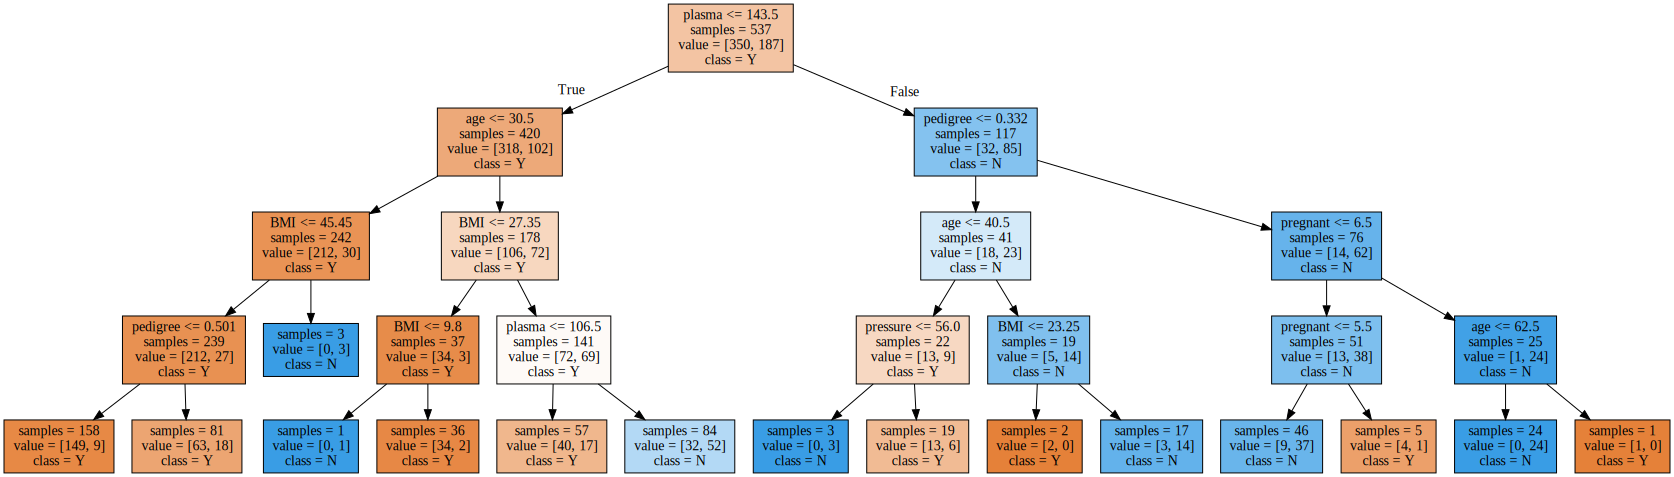

In [ ]:
# 의사결정트리 그리기
from sklearn.tree import export_graphviz
export_graphviz(tree1, out_file="tree1.dot", class_names=["Y", "N"],
                feature_names=X.columns, impurity=False, filled=True)

import graphviz

with open("tree1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

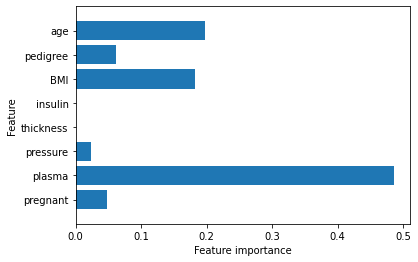

In [103]:
# 변수 중요도 확인
def plot_feature_importances_indian(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_indian(tree1)

DT 모형을 사용할 경우 plasma 변수의 중요도가 가장 높으므로, 실제 피마 인디언의 당뇨병 여부에는 가족력이 가장 큰 영향을 미친다는 것을 알 수 있다.

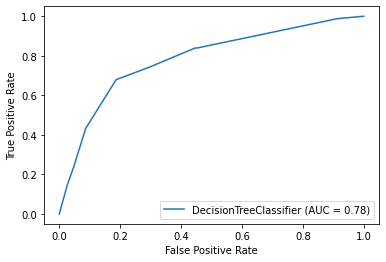

In [104]:
# AUC 구하기
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_roc_curve

plot_roc_curve(tree1, X_test, y_test)  
plt.show()

accuracy 기준으로 성능을 평가하나 AUC 도 구해보았습니다. 0.78입니다.

# **5. 랜덤 포레스트 (RF) 사용**

나무 모형은 전처리에 큰 영향을 받지 않는다. 따라서, 이번에도 전처리를 하지 않은 원본 데이터셋을 사용한다.

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0) # 결정트리 100개
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.788


tree, tree1(가지치기) 를 사용한 것보다 성능이 향상되었습니다.

**1) RF 값 보정 - 가치치기, 결정트리 수 변경 **


In [91]:
forest1 =RandomForestClassifier(n_estimators=250, max_depth=5, random_state=0)
forest1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest1.score(X_test, y_test)))


Accuracy on training set: 0.855
Accuracy on test set: 0.792


max_depth를 1씩, n_estimators 를 50 씩 증가시킨 결과 n_estimators 와 max_depth 가 각각 250, 5가 최적이라 판단했습니다. 

TS도 과대적합에서 벗어났으며 (0.9 기준) TS와 TR의 정확도가 크게 차이 나지 않습니다.


**2) RF 값 보정 - 교차검증**

이번에는 교차검증을 통해 보정을 진행해보겠습니다.

In [92]:
# 폴드 수 3
  
scores_rf3 = cross_val_score(forest1 , X_train, y_train ,cv=3)

print('교차 검증별 정확도:',np.round(scores_rf3, 4))
print('평균 검증 정확도:', np.round(np.mean(scores_rf3), 4))

교차 검증별 정확도: [0.7654 0.7151 0.7542]
평균 검증 정확도: 0.7449


In [93]:
# 폴드 수 5
  
scores_rf5 = cross_val_score(forest1 , X_train, y_train ,cv=5)

print('교차 검증별 정확도:',np.round(scores_rf5, 4))
print('평균 검증 정확도:', np.round(np.mean(scores_rf5), 4))

교차 검증별 정확도: [0.7685 0.7593 0.757  0.757  0.7383]
평균 검증 정확도: 0.756


**3) 모델 성능 평가**

모델 보정이 완료되었으니 TS를 적용해보겠습니다.

In [99]:
# forest1로 레이블 예측
y_pred2 = forest1.predict(X_test)
print(y_pred2)

[0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


In [100]:
# RF의 confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[135,  15],
       [ 33,  48]])

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2, target_names=['y', 'y_pred2']))

              precision    recall  f1-score   support

           y       0.80      0.90      0.85       150
     y_pred2       0.76      0.59      0.67        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



forest1 모델 사용 후 TS를 넣었을 때 정확도는 0.79 입니다.
DT 보다 성능이 더 좋은 것을 알 수 있습니다.


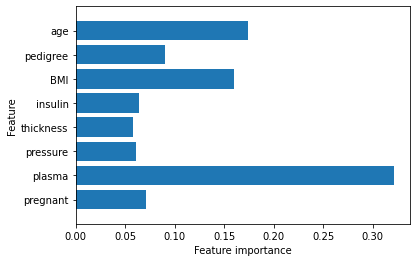

In [105]:
# RF의 변수중요도 그래프
plot_feature_importances_indian(forest1)

1개의 DT를 사용할 때에 비해 TS의 정확도가 올랐고, 변수 중요도도 비교적 고르게 변하였습니다. (단일 트리를 사용할 때 보다 많은 변수들이 중요하다는 결과가 나옴)

하지만 값 보정 전인 forest보다는 forest1 모델의 plasma 변수의 중요도가 조금 더 두드집니다.


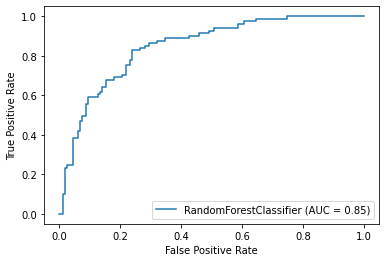

In [106]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_roc_curve

plot_roc_curve(forest1, X_test, y_test)  
plt.show()  

AUC는 0.85 이다. 단일 트리를 사용할 때 보다 모양이 경사진 것이 확인됩니다. (더 값에 딱 맞추려 함. 과대적합)

# **6. 로지스틱 회귀분석 사용**

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

In [108]:
# 변수 정의

# confusion_matrix 계산
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임곗값: {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

이번에는 바로 train set 학습 후 TS의 성능을 계산하도록 하겠습니다.


In [123]:
# raw_dataset 사용
lr_clf_r = LogisticRegression()
lr_clf_r.fit(X_train, y_train)
pred_r = lr_clf_r.predict(X_train)
pred_proba_r = lr_clf_r.predict_proba(X_train)[:, 1]

get_clf_eval(y_train, pred_r, pred_proba_r)

오차행렬
[[311  39]
 [ 82 105]]
정확도: 0.7747, 정밀도: 0.7292, 재현율: 0.5615, F1: 0.6344, AUC:0.7250


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [124]:
# raw_dataset 사용 (ts)
pred_r_ts = lr_clf_r.predict(X_test)
pred_proba_r_ts = lr_clf_r.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred_r_ts, pred_proba_r_ts)

오차행렬
[[133  17]
 [ 36  45]]
정확도: 0.7706, 정밀도: 0.7258, 재현율: 0.5556, F1: 0.6294, AUC:0.7211


**1) 값 보정 - 스케일링**

In [125]:
# 최대-최소 정규화 사용
lr_clf_m = LogisticRegression()
lr_clf_m .fit(X_scaled_train, y_scaled_train)
pred_m = lr_clf_m .predict(X_scaled_train)
pred_proba_m = lr_clf_m.predict_proba(X_scaled_train)[:, 1]

get_clf_eval(y_scaled_train, pred_m, pred_proba_m)

오차행렬
[[319  31]
 [ 90  97]]
정확도: 0.7747, 정밀도: 0.7578, 재현율: 0.5187, F1: 0.6159, AUC:0.7151


In [126]:
# 최대-최소 정규화 사용 (ts)
pred_m_ts = lr_clf_m .predict(X_scaled_test)
pred_proba_m_ts = lr_clf_m.predict_proba(X_scaled_test)[:, 1]

get_clf_eval(y_scaled_test, pred_m_ts, pred_proba_m_ts)

오차행렬
[[135  15]
 [ 40  41]]
정확도: 0.7619, 정밀도: 0.7321, 재현율: 0.5062, F1: 0.5985, AUC:0.7031


In [127]:
# 표준화 사용
lr_clf_s = LogisticRegression()
lr_clf_s .fit(X_scaled1_train, y_scaled1_train)
pred_s= lr_clf_s .predict(X_scaled1_train)
pred_proba_s = lr_clf_s.predict_proba(X_scaled1_train)[:, 1]

get_clf_eval(y_scaled1_train, pred_s, pred_proba_s)

오차행렬
[[311  39]
 [ 82 105]]
정확도: 0.7747, 정밀도: 0.7292, 재현율: 0.5615, F1: 0.6344, AUC:0.7250


In [128]:
# 표준화 사용 (ts)
pred_s_ts= lr_clf_s .predict(X_scaled1_test)
pred_proba_s_ts = lr_clf_s.predict_proba(X_scaled1_test)[:, 1]

get_clf_eval(y_scaled1_test, pred_s_ts, pred_proba_s_ts)

오차행렬
[[134  16]
 [ 36  45]]
정확도: 0.7749, 정밀도: 0.7377, 재현율: 0.5556, F1: 0.6338, AUC:0.7244


확인 결과 TR만으로 비교했을 때 거의 성능이 유사한 것으로 확인됩니다.

그래서 TS를 넣어서 비교한 결과 원본, 최대-최소 정규화, 표준화 중 표준화로 스케일링한 데이터를 사용하는 것이 가장 좋은 성능을 보이는 것으로 확인되었다.

표준화로 스케일링한 데이터를 사용하는 경우 정확도, 재현율, F1-SCORE, AUC가 모두 가장 높다.

**2) 임곗값 변경**

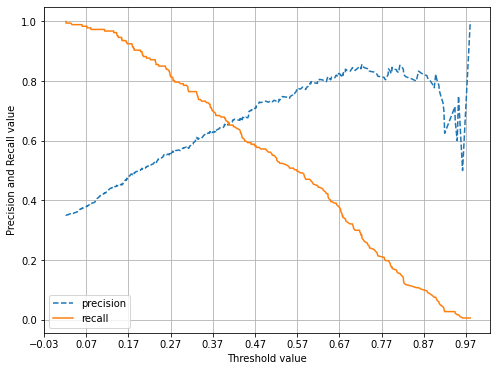

In [136]:
# 정밀도 - 재현도 곡선
pred_proba_s = lr_clf_s.predict_proba(X_scaled1_train)[:, 1]
precision_recall_curve_plot(y_scaled1_train, pred_proba_s)

확인 결과 0.4 정도에서 정밀도와 재현율이 같아지는 것을 알 수 있습니다. 아무리 모델 평가 기준이 accuracy 여도 재현율의 수치를 보정할 필요가 있음이 확인됩니다.


In [137]:
# 임곗값 변화하며 모델 튜닝
thresholds = [0.24, 0.27, 0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54,0.57,0.60,0.63,0.66]
pred_proba_s = lr_clf_s.predict_proba(X_scaled1_train)
get_eval_by_threshold(y_scaled1_train, pred_proba_s[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.24
오차행렬
[[212 138]
 [ 27 160]]
정확도: 0.6927, 정밀도: 0.5369, 재현율: 0.8556, F1: 0.6598, AUC:0.7307
임곗값: 0.27
오차행렬
[[228 122]
 [ 35 152]]
정확도: 0.7076, 정밀도: 0.5547, 재현율: 0.8128, F1: 0.6594, AUC:0.7321
임곗값: 0.3
오차행렬
[[241 109]
 [ 40 147]]
정확도: 0.7225, 정밀도: 0.5742, 재현율: 0.7861, F1: 0.6637, AUC:0.7373
임곗값: 0.33
오차행렬
[[258  92]
 [ 44 143]]
정확도: 0.7467, 정밀도: 0.6085, 재현율: 0.7647, F1: 0.6777, AUC:0.7509
임곗값: 0.36
오차행렬
[[269  81]
 [ 52 135]]
정확도: 0.7523, 정밀도: 0.6250, 재현율: 0.7219, F1: 0.6700, AUC:0.7452
임곗값: 0.39
오차행렬
[[279  71]
 [ 60 127]]
정확도: 0.7561, 정밀도: 0.6414, 재현율: 0.6791, F1: 0.6597, AUC:0.7381
임곗값: 0.42
오차행렬
[[291  59]
 [ 66 121]]
정확도: 0.7672, 정밀도: 0.6722, 재현율: 0.6471, F1: 0.6594, AUC:0.7392
임곗값: 0.45
오차행렬
[[297  53]
 [ 76 111]]
정확도: 0.7598, 정밀도: 0.6768, 재현율: 0.5936, F1: 0.6325, AUC:0.7211
임곗값: 0.48
오차행렬
[[310  40]
 [ 79 108]]
정확도: 0.7784, 정밀도: 0.7297, 재현율: 0.5775, F1: 0.6448, AUC:0.7316
임곗값: 0.51
오차행렬
[[312  38]
 [ 84 103]]
정확도: 0.7728, 정밀도: 0.7305, 재현율: 0.5508, F1: 0.6280, AUC:0.7211
임

정확도-정밀도 대비 재현율이 가장 좋은 재현율을 높이는데 가장 좋은 임곗값은 0.24 입니다. 하지만 정밀도가 매우 가장 낮습니다. 

따라서, accuracy도 상승시키고, 재현율도 상승시키는 0.42를 임곗값으로 사용합니다.





In [140]:
# 임계값 변경 위해 ts 구하기
thresholds = [0.24, 0.27, 0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54,0.57,0.60,0.63,0.66]
pred_proba_s = lr_clf_s.predict_proba(X_scaled1_test)
get_eval_by_threshold(y_scaled1_test, pred_proba_s[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.24
오차행렬
[[103  47]
 [ 10  71]]
정확도: 0.7532, 정밀도: 0.6017, 재현율: 0.8765, F1: 0.7136, AUC:0.7816
임곗값: 0.27
오차행렬
[[110  40]
 [ 12  69]]
정확도: 0.7749, 정밀도: 0.6330, 재현율: 0.8519, F1: 0.7263, AUC:0.7926
임곗값: 0.3
오차행렬
[[115  35]
 [ 14  67]]
정확도: 0.7879, 정밀도: 0.6569, 재현율: 0.8272, F1: 0.7322, AUC:0.7969
임곗값: 0.33
오차행렬
[[119  31]
 [ 18  63]]
정확도: 0.7879, 정밀도: 0.6702, 재현율: 0.7778, F1: 0.7200, AUC:0.7856
임곗값: 0.36
오차행렬
[[121  29]
 [ 22  59]]
정확도: 0.7792, 정밀도: 0.6705, 재현율: 0.7284, F1: 0.6982, AUC:0.7675
임곗값: 0.39
오차행렬
[[122  28]
 [ 25  56]]
정확도: 0.7706, 정밀도: 0.6667, 재현율: 0.6914, F1: 0.6788, AUC:0.7523
임곗값: 0.42
오차행렬
[[126  24]
 [ 26  55]]
정확도: 0.7835, 정밀도: 0.6962, 재현율: 0.6790, F1: 0.6875, AUC:0.7595
임곗값: 0.45
오차행렬
[[129  21]
 [ 30  51]]
정확도: 0.7792, 정밀도: 0.7083, 재현율: 0.6296, F1: 0.6667, AUC:0.7448
임곗값: 0.48
오차행렬
[[131  19]
 [ 34  47]]
정확도: 0.7706, 정밀도: 0.7121, 재현율: 0.5802, F1: 0.6395, AUC:0.7268
임곗값: 0.51
오차행렬
[[134  16]
 [ 36  45]]
정확도: 0.7749, 정밀도: 0.7377, 재현율: 0.5556, F1: 0.6338, AUC:0.7244
임

In [141]:
binarizer = Binarizer(threshold=0.42)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_042 = binarizer.fit_transform(pred_proba_s[:, 1].reshape(-1, 1))

get_clf_eval(y_scaled1_test, pred_th_042, pred_proba_s[:, 1])

오차행렬
[[126  24]
 [ 26  55]]
정확도: 0.7835, 정밀도: 0.6962, 재현율: 0.6790, F1: 0.6875, AUC:0.7595


확인 결과 로지스틱 회귀 모형 사용 시에는 정확도가 0.7835인 것이 확인됩니다.

# **7. SVM**

SVM 은 스케일링의 영향을 크게 받고 TR에서의 과대적합 가능성이 큰 모델입니다. 따라서 처음부터 교차검증을 하고 raw data - 최대 최소 정규화 - 표준화 와 선형 - 비선형 6개, raw data의 SVM 모델을 조합해서 최적의 모델을 찾아보겠습니다.

또한 교차 검증

In [142]:
# raw_data svm

import sklearn.svm as svm
from sklearn import metrics

svm_clf = svm.SVC()
svm_clf .fit(X_train,y_train)

pre = svm_clf.predict(X_train)
actualScore = metrics.accuracy_score(y_train,pre)

print("TR 분할 전 acuuracy : {0}".format(float(actualScore)))

TR 분할 전 acuuracy : 0.7635009310986964


TR의 성능을 평가하기 위해 5-fold-교차검증을 진행한다.

In [143]:
# raw_data & 선형 svm
svm_clf1 =svm.SVC(kernel = 'linear')

from sklearn.model_selection import cross_val_score, cross_validate
scores1 = cross_val_score(svm_clf1, X_train, y_train, cv = 5)
scores1

array([0.78703704, 0.78703704, 0.74766355, 0.77570093, 0.72897196])

In [144]:
print('5-fold-교차검증 평균 (raw data & 선형): ', scores1.mean())

5-fold-교차검증 평균 (raw data & 선형):  0.7652821045344409


In [145]:
# raw_data & 비선형 svm
svm_clf2 =svm.SVC(kernel = 'rbf')

# 교차검증
scores2 = cross_val_score(svm_clf2, X_train, y_train, cv = 5)
scores2

array([0.75      , 0.75      , 0.72897196, 0.74766355, 0.72897196])

In [146]:
print('5-fold-교차검증 평균 (raw data & 비선형): ', scores2.mean())

5-fold-교차검증 평균 (raw data & 비선형):  0.7411214953271028


In [147]:
# 최대- 최소 정규화 & 선형 svm
svm_clf_m1 =svm.SVC(kernel = 'linear')

# 교차검증
scores3 = cross_val_score(svm_clf_m1, X_scaled_train, y_scaled_train, cv = 5)
scores3

array([0.78703704, 0.7962963 , 0.73831776, 0.76635514, 0.71028037])

In [148]:
print('5-fold-교차검증 평균 (최대-최소 정규화 & 선형): ', scores3.mean())

5-fold-교차검증 평균 (최대-최소 정규화 & 선형):  0.7596573208722741


In [149]:
# 최대- 최소 정규화 & 비선형 svm
svm_clf_m2 =svm.SVC(kernel = 'rbf')

# 교차검증
scores4 = cross_val_score(svm_clf_m2, X_scaled_train, y_scaled_train, cv = 5)
scores4

array([0.77777778, 0.78703704, 0.75700935, 0.80373832, 0.70093458])

In [150]:
print('5-fold-교차검증 평균 (최대-최소 정규화 & 비선형): ', scores4.mean())

5-fold-교차검증 평균 (최대-최소 정규화 & 비선형):  0.7652994115610937


In [151]:
# 표준화 & 선형 svm
svm_clf_s1 =svm.SVC(kernel = 'linear')

# 교차검증
scores5 = cross_val_score(svm_clf_s1, X_scaled1_train, y_scaled1_train, cv = 5)
scores5

array([0.78703704, 0.78703704, 0.75700935, 0.77570093, 0.71962617])

In [152]:
print('5-fold-교차검증 평균 (표준화 & 선형): ', scores5.mean())

5-fold-교차검증 평균 (표준화 & 선형):  0.765282104534441


In [153]:
# 표준화 & 비선형 svm
svm_clf_s2 =svm.SVC(kernel = 'rbf')

# 교차검증
scores6 = cross_val_score(svm_clf_s2, X_scaled1_train, y_scaled1_train, cv = 5)
scores6

array([0.77777778, 0.78703704, 0.74766355, 0.79439252, 0.69158879])

In [154]:
print('5-fold-교차검증 평균 (표준화 & 비선형): ', scores6.mean())

5-fold-교차검증 평균 (표준화 & 비선형):  0.7596919349255798


In [155]:
print(actualScore,scores1.mean(), scores2.mean(), scores3.mean(), scores4.mean(), scores5.mean(),scores6.mean())

0.7635009310986964 0.7652821045344409 0.7411214953271028 0.7596573208722741 0.7652994115610937 0.765282104534441 0.7596919349255798


확인 결과 최대-최소정규화 스캐일링 - 비선형 svm의 성능이 가장 좋은 것으로 나왔습니다. (큰 차이는 없다.)

In [156]:
svm_clf_s2 .fit(X_test,y_test)

pre_test = svm_clf.predict(X_test)
actualScore_test = metrics.accuracy_score(y_test,pre_test)

print("TS acuuracy : {0}".format(float(actualScore_test)))

TS acuuracy : 0.7575757575757576


TS를 적용했을 때는 75.7575 입니다.

# **8. DNN**

In [179]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint,EarlyStopping
import os

DNN = models.Sequential() # 1층
DNN.add(Dense(12, input_dim = 8, activation='relu')) #2층. 노드는 12개로 가정
DNN.add(Dense(8, activation='relu')) #2층. 8개 노드의 은닉층
DNN.add(Dense(1, activation='sigmoid')) #3층

DNN.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy']) #정확도 기준 평가

In [180]:
# 모델 최적화 설정. 30개 대기 후 stop 한다.
MODEL_DIR = './DNN/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    

modelpath="./DNN/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

에폭과 배치 사이즈를 조절합니다.

에폭은 200입니다. 너무 크면 OVERFITTING이 일어날 수도 있지만 전반적으로 성능이 떨어져 크게 잡았습다.

배치사이즈는 10이다. 한 턴에 10개씩 , 50턴 학습시킨다.


In [181]:
history =  DNN.fit(X_train,y_train,epochs=200,batch_size=10,validation_data=(X_test, y_test),verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 1.93194, saving model to ./DNN/01-1.9319.hdf5

Epoch 00002: val_loss improved from 1.93194 to 1.13481, saving model to ./DNN/02-1.1348.hdf5

Epoch 00003: val_loss improved from 1.13481 to 0.86554, saving model to ./DNN/03-0.8655.hdf5

Epoch 00004: val_loss improved from 0.86554 to 0.85092, saving model to ./DNN/04-0.8509.hdf5

Epoch 00005: val_loss did not improve from 0.85092

Epoch 00006: val_loss improved from 0.85092 to 0.67560, saving model to ./DNN/06-0.6756.hdf5

Epoch 00007: val_loss did not improve from 0.67560

Epoch 00008: val_loss did not improve from 0.67560

Epoch 00009: val_loss did not improve from 0.67560

Epoch 00010: val_loss did not improve from 0.67560

Epoch 00011: val_loss did not improve from 0.67560

Epoch 00012: val_loss did not improve from 0.67560

Epoch 00013: val_loss did not improve from 0.67560

Epoch 00014: val_loss improved from 0.67560 to 0.62878, saving model to ./DNN/14-0.6288.hdf5

Epoch 00015: val_loss d

X_test

In [182]:
# 정확도 출력
print("\n TR Accuracy: %.4f" % (DNN.evaluate(X_train, y_train)[1]))
print("\n TS Accuracy: %.4f" % (DNN.evaluate(X_test, y_test)[1]))

17/17 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.7281

 TR Accuracy: 0.7281
8/8 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7403

 TS Accuracy: 0.7403


denst, 에폭, 배치 사이즈에 무작위로 여러 값을 넣어 TS의 성능이 낮지 않은 값을 찾아내었다. (무작위 적용이니 더 좋은 값이 있을 가능성이 크다.) 

해당 값을 적용시 특이한 점은 TR보다 TS의 성능이 더 좋게 나온다는 것이다.

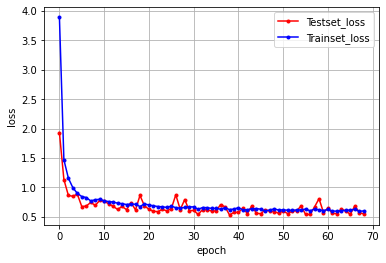

In [183]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

TR과 TS의 loss 값 확인 결과 (loss는 작을 수록 좋다. )TR은 특정값에서 확 낮아지는 경향이 있으나 TS는 들쑥날쑥하다. 

# **9. 모델선정**

- DT : 0.76
- RF : 0.792
- 로지스틱 회귀분석 : 0.7835
- SVM : 0.7575
- DNN : 0.7403

TS 적용시 accuracy (이번 연구 성능 평가 기준) 을 비교한 값이다.

RF 모형인 forest1을 적용시 처음에는 TR의 accuracy가 1이 나온다. 그러나 가지치기와 스케일링을 통해 값을 보정한 결과  TR의 accuracy가 0.855, 거기에 폴드를 5개로 해서 교차검증시 TR의 accuracy가 0. 756이 되었다.

결론적으로 TR과 TS의 accuracy에 큰 차이가 없고 TR 적용시 과적합이 나와 값을 보정했으며 TS의 성능이 가장 좋게 나온 RF 모형을 선택해서 피마인디언 당뇨병 예측 / 분류를 진행한다.

# **10. 추가 연구 제안**

SVM, DNN 등 기존에 T성능이 우수하다고 알려진 모형 (TR 기준) 들의 성능이 생각보다 낮게 나왔다. 또한, 하이퍼 파라미터를 일정량 혹은 무작위로 적용해서 값을 보정하다보니 최적의 모수를 찾는 것에 어려움을 겪었다. (특히, DNN) 따라서 최적화를 배우며 보다 나은 모델을 찾을 수 있어야 한다.